In [1]:
import polars as pl
import matplotlib.pyplot as plt

FILE_PATH = "../csv_files/processed_small_dataset.csv"

In [27]:
genre_mapping = {
    12: "Rock",
    15: "Electronic",
    38: "Experimental",
    21: "Hip-Hop",
    17: "Folk",
    1235: "Instrumental",
    10: "Pop",
    2: "International",
    5: "Classical",
    8: "Old-Time / Historic",
    4: "Jazz",
    9: "Country",
    14: "Soul-RnB",
    3: "Spoken",
    13: "Easy Listening"
}

In [28]:
df = pl.read_csv(FILE_PATH)
df

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food"""
3,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""medium""",256000,0,null,"""2008-11-26 01:48:14""","""2008-11-26 00:00:00""",237,1,"""Hip-Hop""","""[21]""","""[21]""",null,1470,"""en""","""Attribution-NonCommercial-Shar…",514,null,4,null,"""[]""","""Electric Ave"""
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World"""
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway"""
20,0,"""2008-11-26 01:45:05""","""2009-01-06 00:00:00""",null,2,4,"""<p> ""spiritual songs"" from Nic…",2710,null,"""[]""","""Niris""",13,"""Album""","""1990-01-01 00:00:00""","""2011-01-01 00:00:00""",null,"""<p>Songs written by: Nicky Coo…",2,"""2008-11-26 01:42:52""",10,4,51.895927,"""Colchester England""",0.891874,"""Nicky Cook ""","""Nicky Cook""",null,"""['instrumentals', 'experimenta…",null,null,"""training""","""large""",256000,0,null,"""2008-11-26 01:48:56""","""2008-01-01 00:00:00""",311,0,null,"""[76, 103]""","""[17, 10, 76, 103]""",null,978,"""en""","""Attribution-NonCommercial-NoDe…",361,null,3,null,"""[]""","""Spiritual Level"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

In [29]:
parsed_df = df.with_columns([
  pl.col("genres")
    .str.strip_chars('[]" ')
    .str.split(",")
    .alias("parsed_genres_list")
  ]
)
parsed_df

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1,parsed_genres_list
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str,list[str]
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food""","[""21""]"
3,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""medium""",256000,0,null,"""2008-11-26 01:48:14""","""2008-11-26 00:00:00""",237,1,"""Hip-Hop""","""[21]""","""[21]""",null,1470,"""en""","""Attribution-NonCommercial-Shar…",514,null,4,null,"""[]""","""Electric Ave""","[""21""]"
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World""","[""21""]"
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway""","[""10""]"
20,0,"""2008-11-26 01:45:05""","""2009-01-06 00:00:00""",null,2,4,"""<p> ""spiritual songs"" from Nic…",2710,null,"""[]""","""Niris""",13,"""Album""","""1990-01-01 00:00:00""","""2011-01-01 00:00:00""",null,"""<p>Songs written by: Nicky Coo…",2,"""2008-11-26 01:42:52""",10,4,51.895927,"""Colchester England""",0.891874,"""Nicky Cook ""","""Nicky Cook""",null,"""['instrumentals', 'experimenta…",null,null,"""training""","""large""",256000,0,null,"""2008-11-26 01:48:56""","""2008-01-01 00:00:00""",311,0,null,"""[76, 103]""","""[17, 10, 76, 103]""",null,978,"""en""","""Attribution-NonCommercial-NoDe…",361,null,3,null,"""[

In [30]:
exploded = parsed_df.explode("parsed_genres_list")
exploded = exploded.with_columns(
    pl.col("parsed_genres_list")
    .str.strip_chars()
)

In [31]:
exploded.select("parsed_genres_list").sample(20)

parsed_genres_list
str
"""250"""
"""659"""
"""125"""
"""17"""
"""224"""
…
"""1235"""
"""15"""
"""53"""


In [32]:
exploded = exploded.filter(
    pl.col("parsed_genres_list").str.strip_chars() != ""
)

In [33]:
exploded.with_columns(
    pl.col("parsed_genres_list")
    .cast(pl.Int16)
)

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1,parsed_genres_list
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str,i16
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food""",21
3,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""medium""",256000,0,null,"""2008-11-26 01:48:14""","""2008-11-26 00:00:00""",237,1,"""Hip-Hop""","""[21]""","""[21]""",null,1470,"""en""","""Attribution-NonCommercial-Shar…",514,null,4,null,"""[]""","""Electric Ave""",21
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World""",21
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway""",10
20,0,"""2008-11-26 01:45:05""","""2009-01-06 00:00:00""",null,2,4,"""<p> ""spiritual songs"" from Nic…",2710,null,"""[]""","""Niris""",13,"""Album""","""1990-01-01 00:00:00""","""2011-01-01 00:00:00""",null,"""<p>Songs written by: Nicky Coo…",2,"""2008-11-26 01:42:52""",10,4,51.895927,"""Colchester England""",0.891874,"""Nicky Cook ""","""Nicky Cook""",null,"""['instrumentals', 'experimenta…",null,null,"""training""","""large""",256000,0,null,"""2008-11-26 01:48:56""","""2008-01-01 00:00:00""",311,0,null,"""[76, 103]""","""[17, 10, 76, 103]""",null,978,"""en""","""Attribution-NonCommercial-NoDe…",361,null,3,null,"""[]""","""Spiritual Level""",76
…,…,…,…,

In [34]:
exploded = exploded.with_columns([
    pl.col("parsed_genres_list")
    .replace(genre_mapping)
    .alias("parsed_genres_list_names")
    ]
)
exploded

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1,parsed_genres_list,parsed_genres_list_names
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str,str,str
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food""","""21""","""Hip-Hop"""
3,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""medium""",256000,0,null,"""2008-11-26 01:48:14""","""2008-11-26 00:00:00""",237,1,"""Hip-Hop""","""[21]""","""[21]""",null,1470,"""en""","""Attribution-NonCommercial-Shar…",514,null,4,null,"""[]""","""Electric Ave""","""21""","""Hip-Hop"""
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World""","""21""","""Hip-Hop"""
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway""","""10""","""Pop"""
20,0,"""2008-11-26 01:45:05""","""2009-01-06 00:00:00""",null,2,4,"""<p> ""spiritual songs"" from Nic…",2710,null,"""[]""","""Niris""",13,"""Album""","""1990-01-01 00:00:00""","""2011-01-01 00:00:00""",null,"""<p>Songs written by: Nicky Coo…",2,"""2008-11-26 01:42:52""",10,4,51.895927,"""Colchester England""",0.891874,"""Nicky Cook ""","""Nicky Cook""",null,"""['instrumentals', 'experimenta…",null,null,"""training""","""large""",256000,0,null,"""2008-11-26 01:48:56""","""2008-01-01 00:00:00""",311,0,null,"""[76, 103]""","""[17, 10, 76, 103]""",null,97

In [37]:
grouped = (
    exploded
    .group_by("track_id")
    .agg(pl.col("parsed_genres_list_names").alias("genre_names"))
    .sort(by="track_id")
)

grouped

track_id,genre_names
i64,list[str]
2,"[""Hip-Hop""]"
3,"[""Hip-Hop""]"
5,"[""Hip-Hop""]"
10,"[""Pop""]"
20,"[""76"", ""103""]"
…,…
155316,"[""25""]"
155317,"[""25""]"
155318,"[""25""]"


In [39]:
grouped = ( 
    grouped
    .group_by("genre_names")
    .agg(pl.col("track_id").count().alias("count"))
)

grouped

genre_names,count
list[str],u32
"[""Rock"", ""Electronic"", ""Experimental""]",103
"[""42"", ""107"", ""184""]",26
"[""25"", ""32"", ""100""]",12
"[""26"", ""Experimental"", ""90""]",4
"[""Jazz"", ""Electronic"", … ""311""]",5
…,…
"[""Electronic"", ""18"", ""362""]",8
"[""26"", ""Experimental"", ""76""]",8
"[""Rock"", ""171""]",2


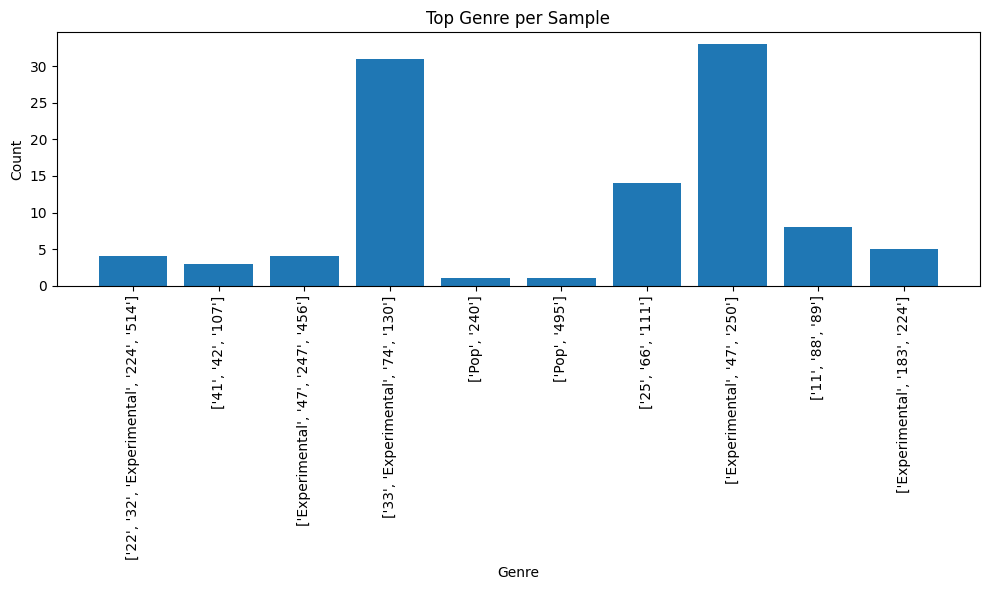

In [45]:
# Extract columns as lists directly from Polars
grouped = grouped.sample(10)
genres = grouped["genre_names"].to_list()
genres = [str(i) for i in genres]
counts = grouped["count"].to_list()

# Plot
plt.figure(figsize=(10,6))
plt.bar(genres, counts)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top Genre per Sample")
plt.tight_layout()
plt.show()